# Diwali Sales Analysis

In [32]:
import numpy as np    # manazing large data
import pandas as pd    # handling relational data
import matplotlib.pyplot as plt   # visualization
import seaborn as sb    # visualization

# Data Extraction / Collection

In [33]:
df = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape')

In [34]:
df.shape  # rows * cols

(11251, 15)

In [35]:
df.size # 11251 * 15 == rows * cols

168765

In [36]:
df.head()   # default returns top 5 values
df.head(60)   # limited top 60 rows
df.head(61) 

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,1001389,Smriti,P00261542,F,26-35,33,1,Delhi,Central,Agriculture,Stationery,3,21463.0,NaN,NaN
57,1002665,Champaklata,P00261842,F,36-45,36,0,Delhi,Central,IT Sector,Stationery,4,21427.0,NaN,NaN
58,1002496,Patil,P00114042,F,51-55,52,0,Delhi,Central,IT Sector,Stationery,4,21423.0,NaN,NaN
59,1001442,Atharv,P00145042,M,18-25,18,1,Delhi,Central,Construction,Stationery,2,21401.0,NaN,NaN


In [37]:
df.info()  # returns schema and full information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# Data Cleaning

In [38]:
df.drop(['Status', 'unnamed1'], axis = 1, inplace = True)  # to drop entire col

# inplace param for to do the operation without creating new dataset object
# it did the operation in the original memory it self....

In [39]:
df.info() #  after removing the null cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [40]:
df.isnull()  # to check for null vals

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [41]:
# to count null vals in each col

df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [42]:
df.shape   # before removing null val contained rows..

(11251, 13)

In [43]:
df = df.dropna()   # to remove null vals

In [44]:
df.shape  # after removing null vals

(11239, 13)

In [45]:
df.info()  # now we have all the data with non-vals

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [46]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [47]:
# change data type

df['Amount'] = df['Amount'].astype('int64')

In [48]:
df['Amount'].dtypes  # or df['col'].dtype aslo works

dtype('int64')

In [49]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [50]:
df.rename(columns = {'Age Group' : 'Age_Group'}, inplace = True) #  rename col

df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age_Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Data Analysis

In [51]:
df.describe().astype('int64')  #  it may cause data loss while finding mean, std 

# it works only on numerical datatype cols

,User_ID,Age,Marital_Status,Orders,Amount
count,11239,11239,11239,11239,11239
mean,1003003,35,0,2,9453
std,1716,12,0,1,5222
min,1000001,12,0,1,188
25%,1001491,27,0,2,5443
50%,1003064,33,0,2,8109
75%,1004426,43,1,3,12675
max,1006040,92,1,4,23952


In [52]:
df.describe()    #  accurate results

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [53]:
df[['Orders', 'Amount']].describe()  #  for better understanding we cal filter them out for comparision

,Orders,Amount
count,11239.000000,11239.000000
mean,2.489634,9453.610553
std,1.114967,5222.355168
min,1.000000,188.000000
25%,2.000000,5443.000000
50%,2.000000,8109.000000
75%,3.000000,12675.000000
max,4.000000,23952.000000


In [54]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age_Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Data Virtualization and Analysis

# Gender 

### Gender vs Customers

<Axes: xlabel='Gender', ylabel='count'>

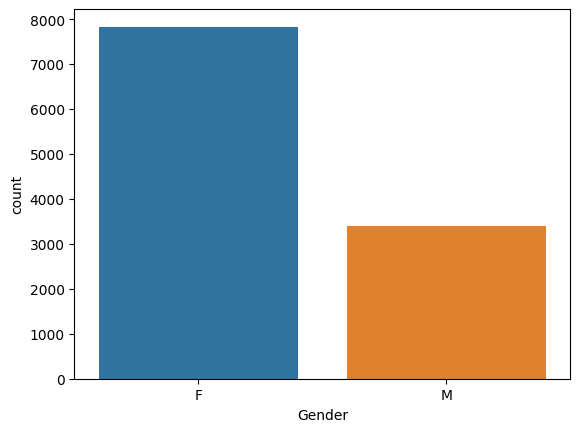

In [56]:
sb.countplot(x = 'Gender', data = df)   #  it wont return value labels

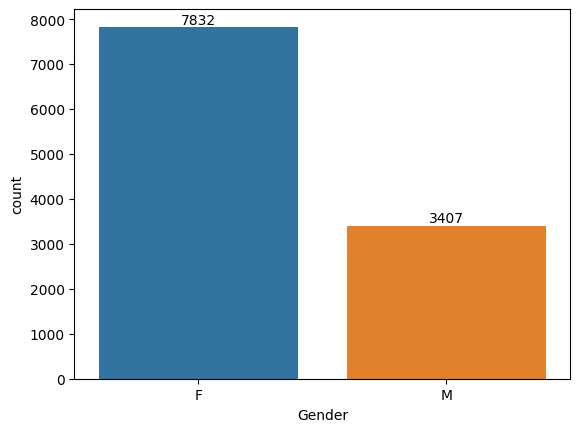

In [57]:
ax = sb.countplot(x = 'Gender', data = df)

for bars in ax.containers:  #  it count val and label them on the above
    ax.bar_label(bars)     

In [58]:
gender_sales = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

gender_sales

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Amount', ylabel='Gender'>

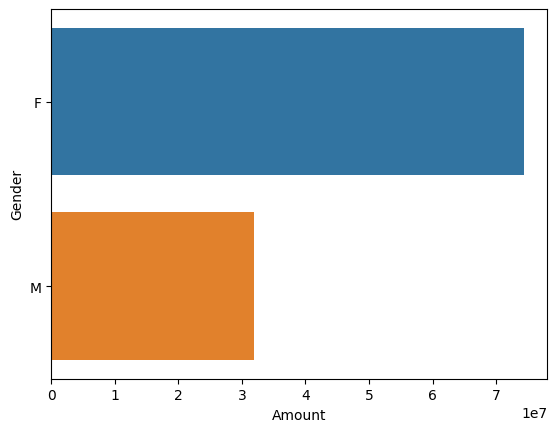

In [59]:
sb.barplot(y = 'Gender', x = 'Amount', data = gender_sales)

 ####  Observation : From the above graph most of the customers are females..

# Age_Group

In [62]:
set(df['Age_Group']) #  unique age groups..

{'0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'}

### Age_group vs Customers

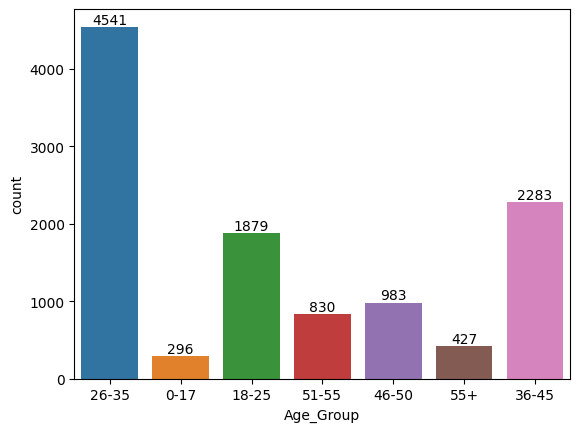

In [63]:
ax = sb.countplot(x = 'Age_Group', data = df)  # includes all men and women

for bars in ax.containers:
    ax.bar_label(bars)

#### Observation: From above graph most of the customers are aged between 26 and 35..

In [64]:
age_group_cnt = df.groupby('Age_Group')['Age_Group'].count().sort_values(ascending = False)

age_group_cnt

Age_Group
26-35    4541
36-45    2283
18-25    1879
46-50     983
51-55     830
55+       427
0-17      296
Name: Age_Group, dtype: int64

### Age_Group vs Gender

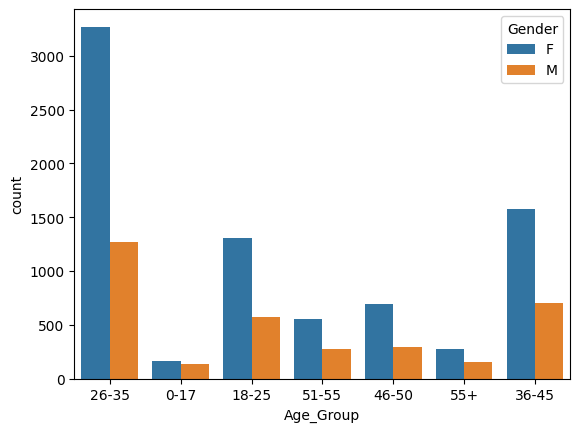

In [65]:
ax = sb.countplot(x = 'Age_Group', data = df, hue = 'Gender')  # without count label

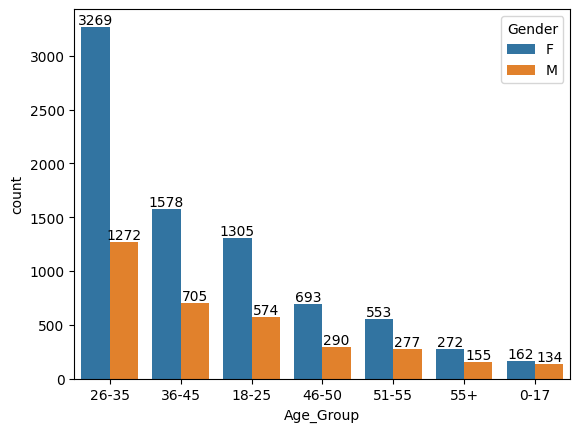

In [66]:
ax = sb.countplot(x = 'Age_Group', data = df, hue = 'Gender', order = df['Age_Group'].value_counts().index) 

for bars in ax.containers:
    ax.bar_label(bars)

#### Observation: From above graph most of customers are females who are aged bw 26-35...

### Age_Group vs  Revenue

In [67]:
# gender_sales = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

# gender_sales

age_group_sales = df.groupby('Age_Group')['Amount'].sum()

age_group_sales

Age_Group
0-17      2699653
18-25    17240732
26-35    42613442
36-45    22144994
46-50     9207844
51-55     8261477
55+       4080987
Name: Amount, dtype: int64

<Axes: xlabel='Age_Group', ylabel='Amount'>

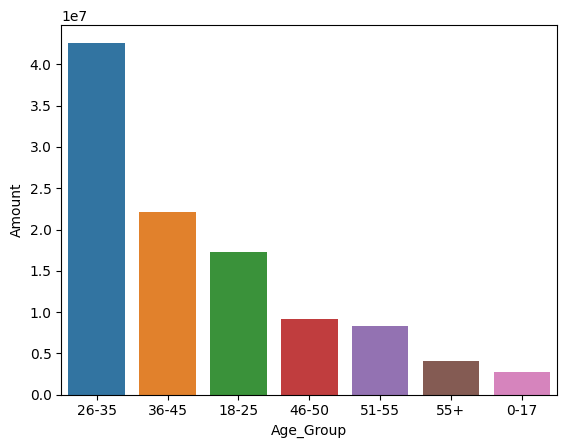

In [68]:
age_group_sales = df.groupby(['Age_Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sb.barplot(data = age_group_sales, x = 'Age_Group', y = 'Amount')


#### Observation: From above graph most of the revenue generated by the people who's age bw 26 and 35, 36-45 and 18-25..

# State

In [70]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age_Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [74]:
# state vs orders
# retrive top 10 states based on orders

set(df['State'])   # states 

{'Andhra\xa0Pradesh',
 'Bihar',
 'Delhi',
 'Gujarat',
 'Haryana',
 'Himachal Pradesh',
 'Jharkhand',
 'Karnataka',
 'Kerala',
 'Madhya Pradesh',
 'Maharashtra',
 'Punjab',
 'Rajasthan',
 'Telangana',
 'Uttar Pradesh',
 'Uttarakhand'}

In [79]:
state_wise_orders = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

state_wise_orders

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


### States vs Sales

<Axes: xlabel='State', ylabel='Orders'>

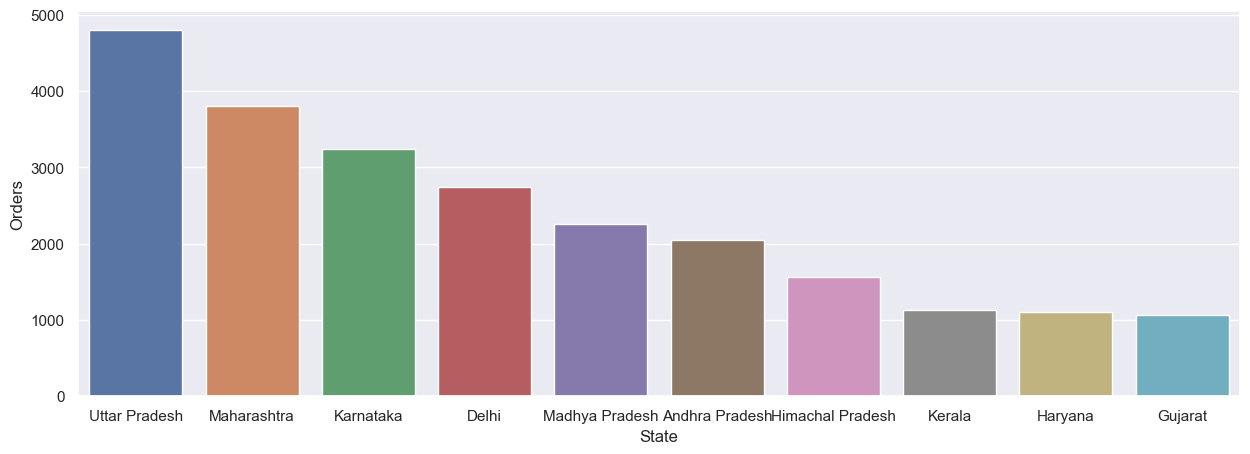

In [92]:
state_wise_orders = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

sb.set(rc = {'figure.figsize':(15, 5)})

sb.barplot(data = state_wise_orders, x = 'State', y = 'Orders')

#### Observation: From the above analysis most of the orders  from Uttar pradesh, Maharastra and Karnatka...

### States vs Revenue

In [95]:
# total sales amount from top 10 states

state_wise_total = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

state_wise_total

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


<Axes: xlabel='State', ylabel='Amount'>

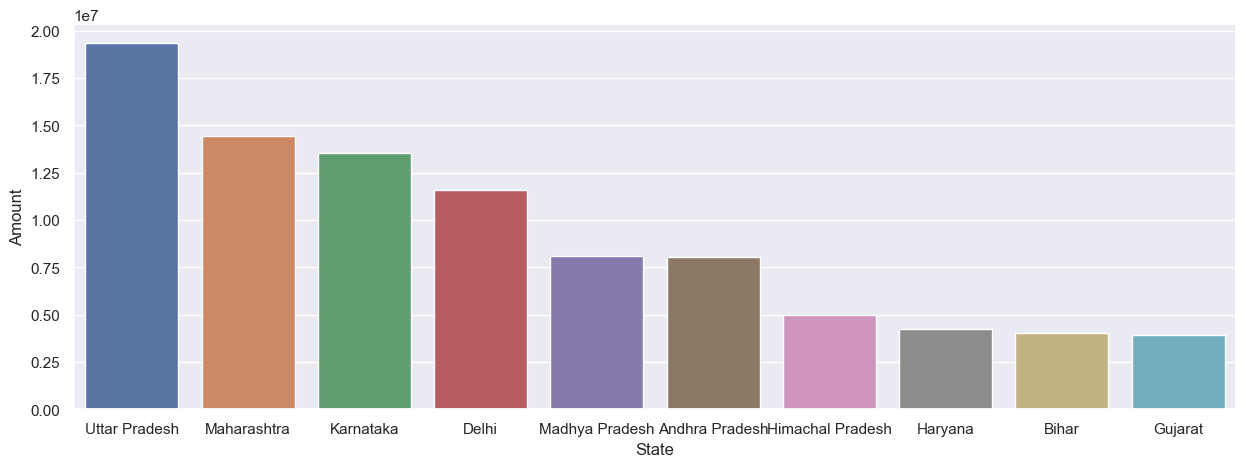

In [97]:
# total sales amount from top 10 states

state_wise_total = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sb.barplot(data = state_wise_total, x = 'State', y = 'Amount')

#### Observation: From above graph most of the revenue generated from Uttar Pradesh, Maharastra and Karnataka..
#### Note: Observe sales of kerala and total amount generated by kerala

# Marital Status

In [100]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age_Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [102]:
set(df['Marital_Status'])

{0, 1}

In [105]:
marital_sts = df.groupby(['Marital_Status'], as_index = False)['User_ID'].count()
marital_sts

,Marital_Status,User_ID
0,0,6518
1,1,4721


### Marital_Status vs  Customers

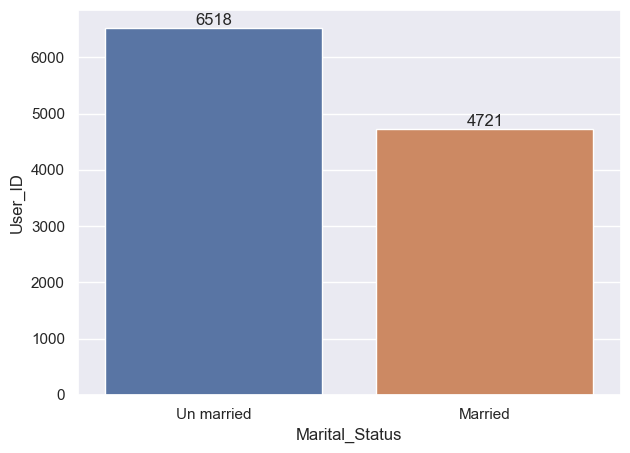

In [128]:
marital_sts = df.groupby(['Marital_Status'], as_index = False)['User_ID'].count()

sb.set(rc = {'figure.figsize':(7, 5)})
#sb.set(style = 'whitegrid')

ax = sb.barplot(data = marital_sts, x = 'Marital_Status', y = 'User_ID')

ax.set(xticklabels = ['Un-married', 'Married'])

for bars in ax.containers:
    ax.bar_label(bars)

#### Observation: From above graph most of customers are unmarried..

In [130]:
marital_wise_total = df.groupby(['Marital_Status'], as_index = False)['Amount'].sum()

marital_wise_total

,Marital_Status,Amount
0,0,62125384
1,1,44123745


### Marital_Status vs Revenue Generated

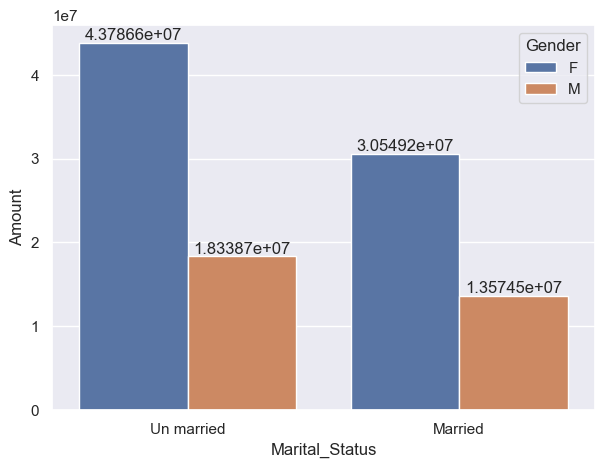

In [137]:
marital_wise_total = df.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum()

ax = sb.barplot(data = marital_wise_total, x = 'Marital_Status', y = 'Amount', hue = 'Gender')

ax.set(xticklabels = ['Un-married', 'Married'])

for bars in ax.containers:
    ax.bar_label(bars)

#### Observation: From the above graph most of revenue generated by unmarried females..

In [139]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age_Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Occupation

In [143]:
set(df['Occupation'])

{'Agriculture',
 'Automobile',
 'Aviation',
 'Banking',
 'Chemical',
 'Construction',
 'Food Processing',
 'Govt',
 'Healthcare',
 'Hospitality',
 'IT Sector',
 'Lawyer',
 'Media',
 'Retail',
 'Textile'}

### Occupation vs  Customers

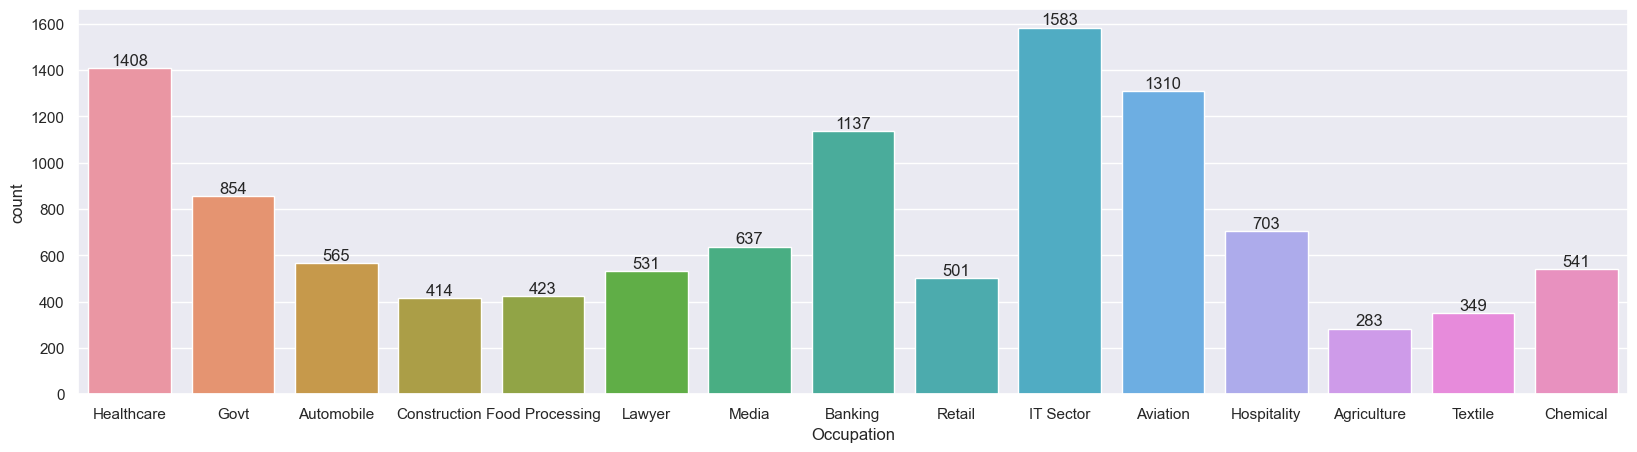

In [151]:
sb.set(rc = {'figure.figsize':(20, 5)})

ax = sb.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

#### Observation: Most of buyers are working in IT, Healthcare and Aviation sectors..

In [154]:
occupation_wise_sales = df.groupby(['Occupation'], as_index = False)['Amount'].sum()

occupation_wise_sales.sort_values(by = 'Amount', ascending = False)

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


### Occupation vs Revenue

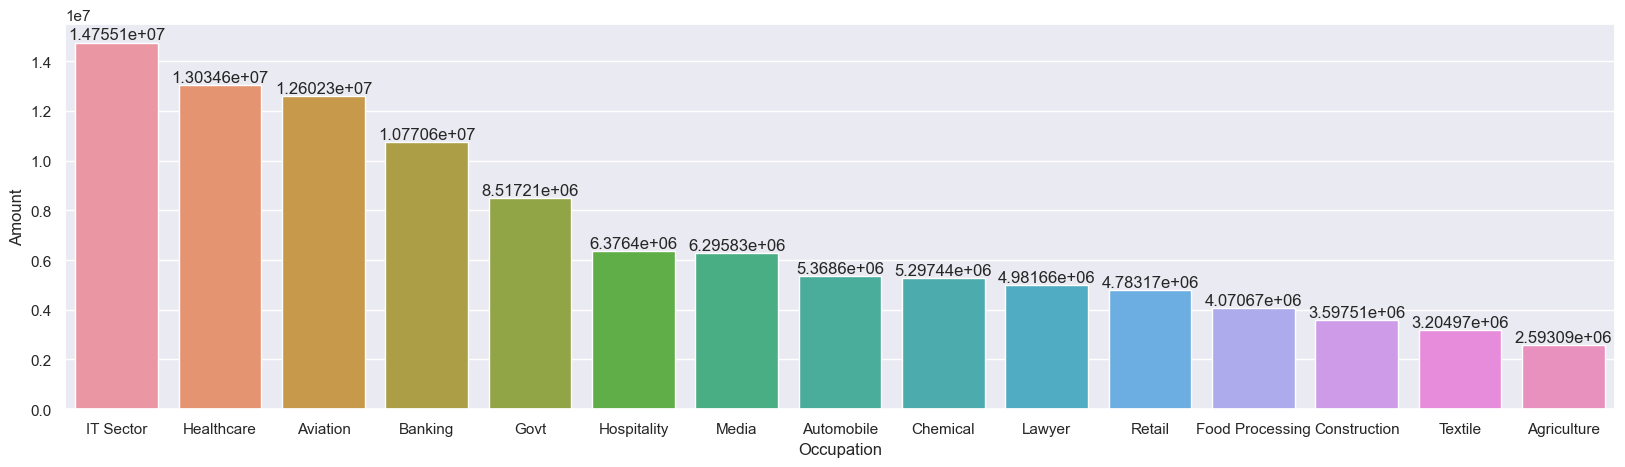

In [157]:
occupation_wise_sales = df.groupby(['Occupation'], as_index = False)['Amount'].sum()

ax = occupation_wise_sales.sort_values(by = 'Amount', ascending = False)

ax = sb.barplot(data = ax, x = 'Occupation', y = 'Amount')

for bars in ax.containers:
    ax.bar_label(bars)


#### Observation: From above graph most of revenue from IT, Healthcare and Aviation working employees..


# Product Category

In [158]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age_Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [160]:
set(df['Product_Category'])

{'Auto',
 'Beauty',
 'Books',
 'Clothing & Apparel',
 'Decor',
 'Electronics & Gadgets',
 'Food',
 'Footwear & Shoes',
 'Furniture',
 'Games & Toys',
 'Hand & Power Tools',
 'Household items',
 'Office',
 'Pet Care',
 'Sports Products',
 'Stationery',
 'Tupperware',
 'Veterinary'}

### Product_Category vs Customers

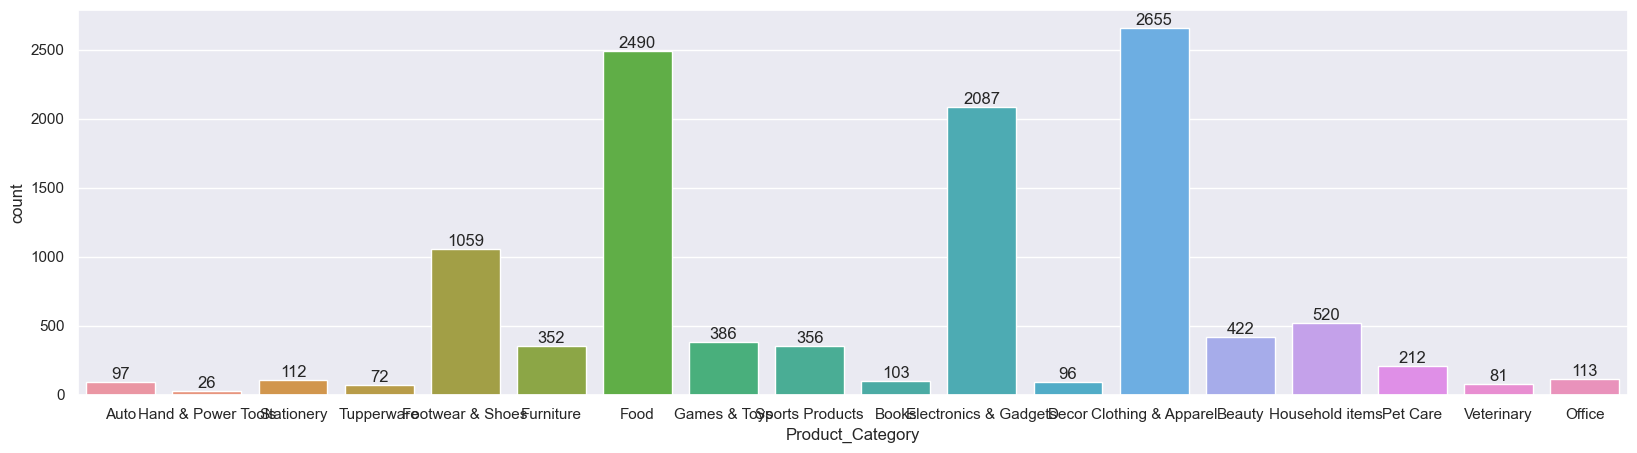

In [165]:
sb.set(rc = {'figure.figsize':(20, 5)})

ax = sb.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

In [166]:
prod_wise_total = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

prod_wise_total

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1958609
15,Stationery,1676051


### Product_Category vs Revenue

<Axes: xlabel='Product_Category', ylabel='Amount'>

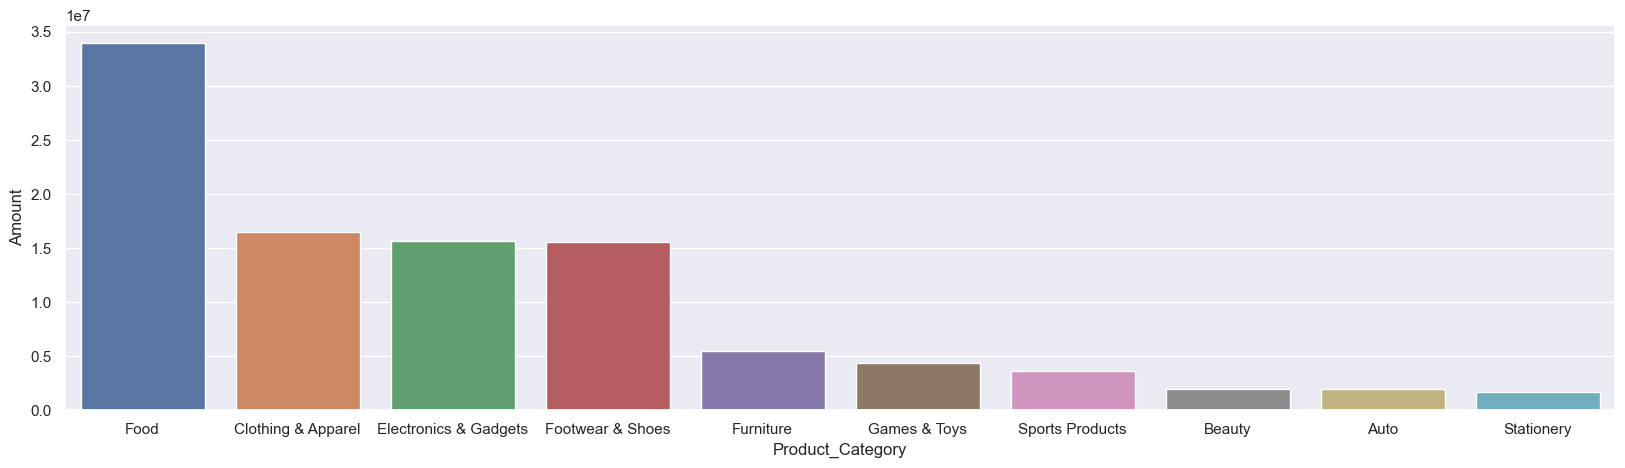

In [170]:
prod_wise_total = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sb.barplot(data = prod_wise_total, x = 'Product_Category', y = 'Amount')


#### Observation: From above graph most of products sold in Food, Cloths, Footwear and Electronic category..

In [172]:
sales_prod_id = df.groupby(['Product_ID'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

sales_prod_id

,Product_ID,Orders
1679,P00265242,127
644,P00110942,116
1504,P00237542,91
1146,P00184942,82
679,P00114942,79
171,P00025442,79
708,P00117942,76
888,P00145042,76
298,P00044442,75
643,P00110842,74


## Product_ID vs Sales

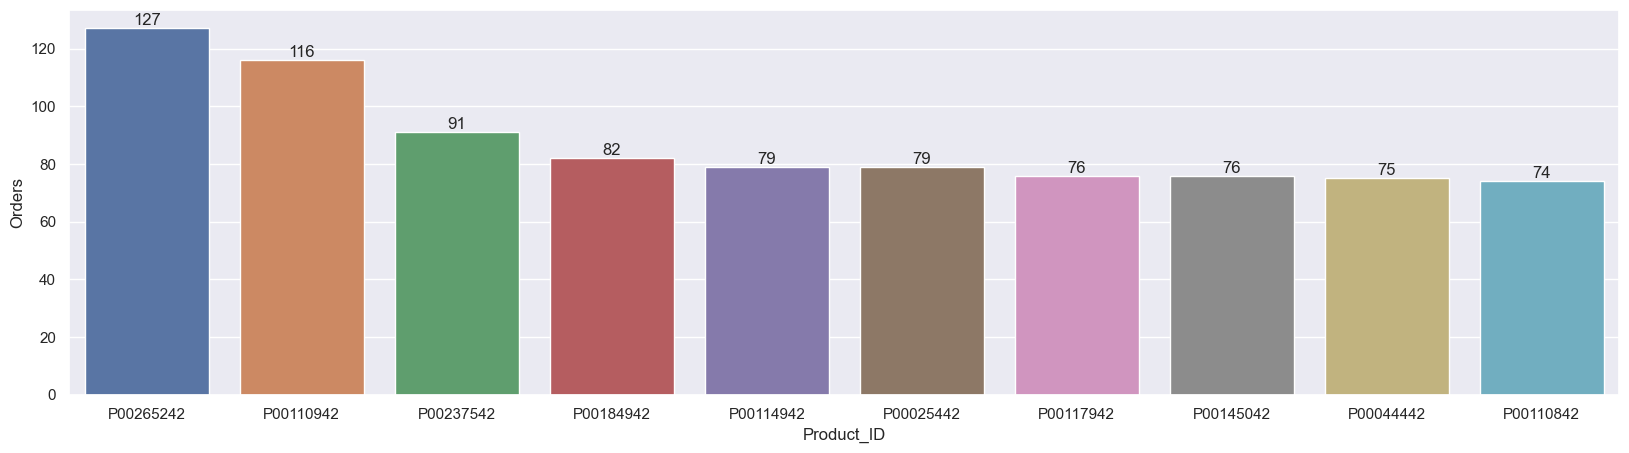

In [177]:
sales_prod_id = df.groupby(['Product_ID'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

ax = sb.barplot(data = sales_prod_id, x = 'Product_ID', y = 'Orders')

for bars in ax.containers:
    ax.bar_label(bars)

#### Observation: From above graph product_id with P00265242 and P00110942 are solded out in large quantity..

## Product_ID vs Revenue

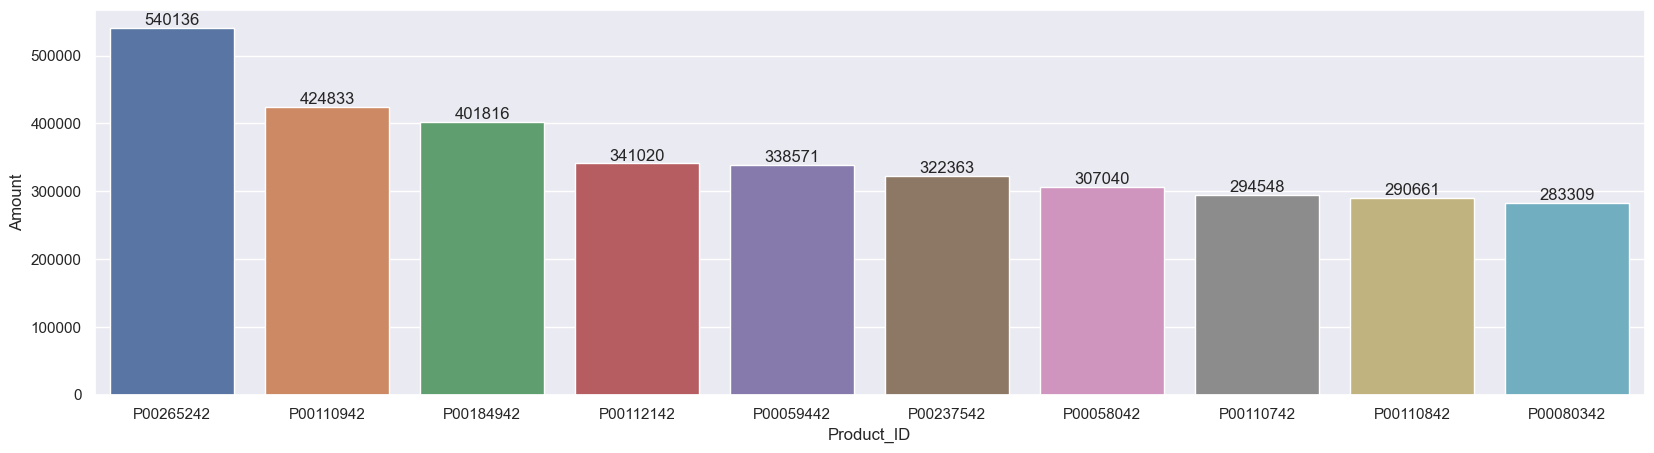

In [182]:
# top 10 most sold products

sales_prod_id = df.groupby(['Product_ID'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

ax = sb.barplot(data = sales_prod_id, x = 'Product_ID', y = 'Amount')

for bars in ax.containers:
    ax.bar_label(bars)

#### Observation: From above graph the products with ID's P00265242 and P00110942 are generated more revenue...

<Axes: xlabel='Product_ID'>

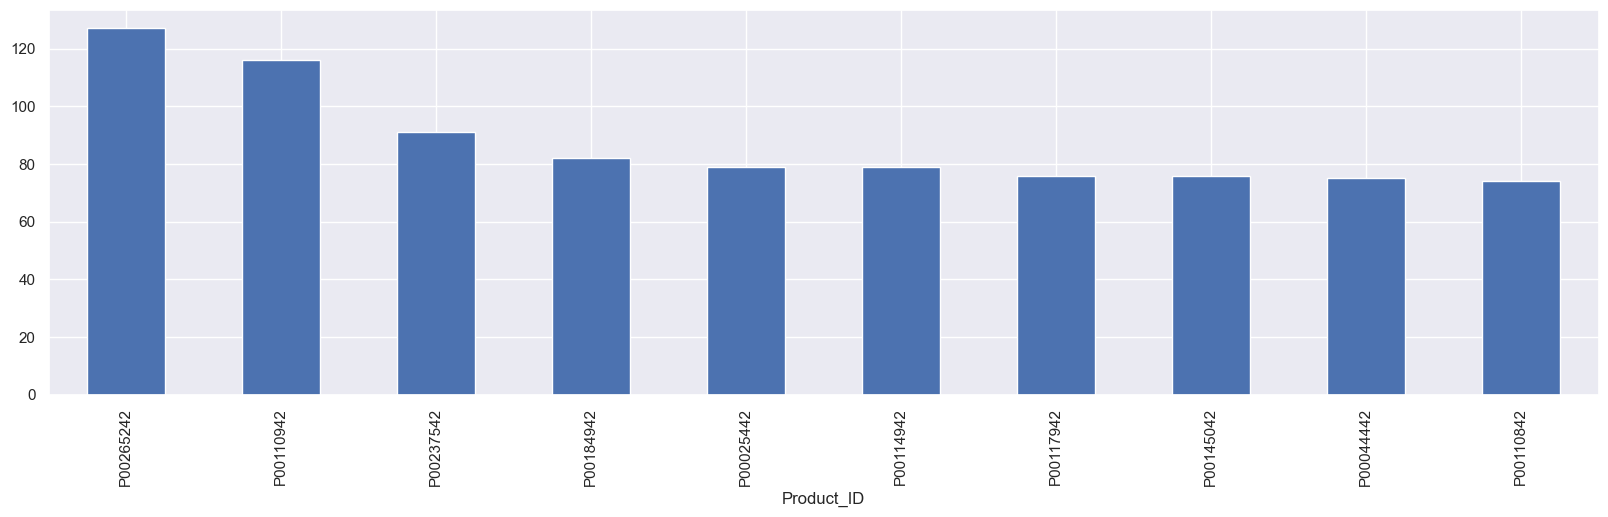

In [190]:
# another way

df.groupby('Product_ID')['Orders'].sum().nlargest(10).plot(kind = 'bar')

# Conclusion:
    
## Most of our customers are unmarried women who are working in IT, Healthcare and aviation sector and they are more likely to buy items from Food, Cloths and electronic category..
    